In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
%matplotlib inline
from deltarule import Perceptron
from sklearn.preprocessing import normalize, Normalizer

In [66]:
iris = datasets.load_iris()
iris.data = iris.data[:100]
iris.target = iris.target[:100]
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target,random_state=0)

In [67]:
X_train = X_train[:,[2,3]]
X_test = X_test[:, [2,3]]
#X_train_norm = normalize(X_train)
#X_test_norm = normalize(X_test)
norm =Normalizer()
norm.fit(iris.data[:,[2,3]], iris.target)
X_train_norm = norm.fit_transform(X_train,y_train)
X_test_norm = norm.fit_transform(X_test,y_test)

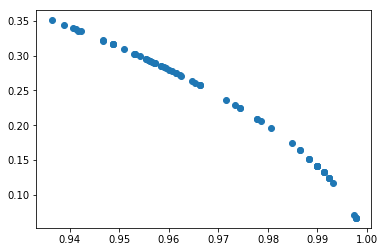

In [68]:
plt.plot(X_train_norm[:,0], X_train_norm[:,1], ls='None', marker='o')
plt.show()

In [69]:
ppn = Perceptron()

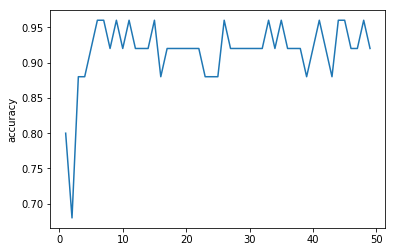

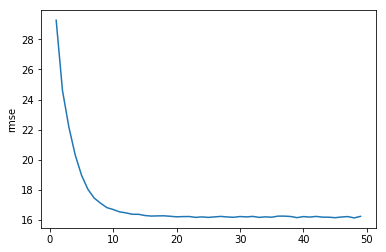

In [71]:
accuracy = []
rmse = []
for k in range(1, 50):
    ppn.fit(X_train_norm, y_train, num_iter = k, rmse = 3)
    accuracy.append(ppn.accuracy(X_test,y_test))
    rmse.append(ppn.rmse(X_train_norm, ppn.change_y_form(y_train)))
plt.plot(range(1,50), accuracy)
plt.ylabel('accuracy')
plt.show()
plt.plot(range(1,50), rmse)
plt.ylabel('rmse')
plt.show()

In [79]:
ppn.fit(X_train_norm, y_train, num_iter = 6, rmse = 3)
ppn.rmse(X_train, ppn.change_y_form(y_train))

526.4321024783376

In [80]:
print(ppn._w)
print(ppn._T)
print(ppn.accuracy(X_test, y_test))

[[ 2.02015104 -0.04168671]
 [-3.63699261  4.20979549]]
[[0.22755977 0.82646947]]
0.96


In [81]:
def f(x):
    return ppn._T[0,0]/ppn._w[1,0] - (ppn._w[0,0]/ppn._w[1,0])*x
def g(x):
    return ppn._T[0,1]/ppn._w[1,1] - (ppn._w[0,1]/ppn._w[1,1])*x

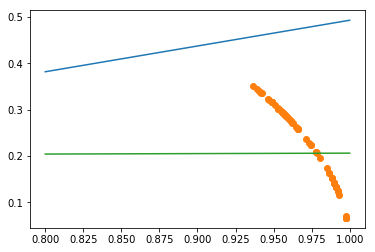

In [86]:
a = f(np.linspace(0.8,1,30))
b = g(np.linspace(0.8,1,30))
plt.plot(np.linspace(0.8,1,30),a)
plt.plot(X_train_norm[:,0], X_train_norm[:,1], ls='None', marker='o')
plt.plot(np.linspace(0.8,1,30),b)
plt.show()